<a href="https://colab.research.google.com/github/funmilola09/Intrusion-detection-using-RNN-for-IoT/blob/master/Garths_copy_of_IndabaX_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic Segmentation with Generative Adversarial Networks


---

## HACKATHON PROBLEM DESCRIPTION

In this hackathon, we'll be working with Generative Adversarial Networks (GANs). They're the deep neural networks being used to generate synthetic images of [people who do not exist](https://thispersondoesnotexist.com/), creatures from Picasso's nightmares, and [deepfakes](https://www.youtube.com/watch?v=gLoI9hAX9dw). But can we use GANs to do something more ... practical? Yes! In this hackathon the challenge is to train a Cycle GAN to segment the pixels in images between a set of classes.  This learning task is called "semantic segmentation".

### Semantic Segmentation

#### Different Computer Vision Learning Tasks

There are various learning tasks in computer vision which attempt to answer different questions: 

1. Image classification - what class does this image belong to?
2. Object detection - where in the image is some object X?
3. Semantic segmentation - which pixels belong to a given class?
4. Instance segmentation - which pixels belong to a found object X?
5. Multimodal learning - what textual description suits this image?

As we try to answer more nuanced questions about images or sequences of images (video) the learning problem becomes harder. In other words, it is easier to tell whether an image is of a cat than it is to generate a sentence describing the image like "there is a cat sitting on a blue mat wearing a unicorn aliceband".

Semantic segmentation, classifying which pixels belong to which class, sits somewhere in the middle in terms of difficulty. It is somewhat "more difficult" than image classification but also somewhat "easier" than looking at an image and trying to generate an appropriate caption for what is happening in that image. 

#### The Semantic Segmentation Problem

When doing semantic segmentation what we are trying to do is approximate some function, $F$, that maps every pixel, $x$, in an image, $X$, to some set of distinct, non-overlapping classes, $\{1, ..., K\}$. In other words we want to produce a pixelwise prediction of belonging to any class.

For example, if we have an input image 256x256 pixels big with three classes, "A", "B" and "C", our function would output 196,608 values (256 x 256 x 3) corresponding to the probability that the model has assigned to each pixel of belonging to each of the classes "A", "B", and "C".

Then to produce final prediction of which class each pixel is, we take the argmax over the probabilities. This final operation produces what we call a "segmentation" map. This map shows us which pixels in an image belong to each specific class. Some example segmentation maps are shown below:

![Semantic Segmentation](https://sergioskar.github.io//assets/img/posts/fcn1.jpg)


#### Using Segmentation Maps To Work Stuff Out

At Aerobotics we use semantic segmentation to identify trees from aerial imagery of orchards taken by drones. This is useful for a number of reasons. Firstly, we can use mathematics to estimate the area of the tree from the segmentation maps, and [photogrammetry techniques](https://en.wikipedia.org/wiki/Photogrammetry) to estimate the height of the tree. With these two estimates we can then estimate the volume of the tree which, as you can imagine, correlates with fruit yield (bigger trees carry more fruit).

This same technique has been used in the [medical condition monitoring](https://en.wikipedia.org/wiki/Medical_image_computing#Segmentation) space to segment tumours from surrounding tissue, estimate their size, and even estimate how aggressively they are growing by segmenting images through time. In other words, semantic segmentation is an important and useful problem to solve.

![Example Tree Semantic Segmentation](https://docs.google.com/uc?export=download&id=1ZA1mkJ0srFLih8ZtOFb13jRt0l3zieEv)

#### Common Architectures for Semantic Segmentation

The most common architectures used to perform semantic segmentation include [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), [ResNet](https://arxiv.org/abs/1512.03385), Autoencoder, and [U-Net](https://arxiv.org/abs/1505.04597) type architectures. The most widely used architecture for semantic segmentation are U-Nets. These models work like a deep deconvolutional autoencoder except that they include skip connections between representations of the same size. This is useful for mapping lower-dimensional feature representations back to the original dimensions of the image.

An illustration of a U-Net being used to perform semantic segmentation is shown below

![Semantic Segmentation Using U-Net](https://docs.google.com/uc?export=download&id=1PVoaIlZIkEncGziiLixBc-gPEDXjg-7_)


## INTRODUCTION TO GANs

### Generative Adversarial Networks



*   Adversarial networks compete against each other in a game; the accuracy of one network is the loss of the competing network.
*   In a generative adversarial network, one network generates something, this could be an image or a signal. The competing network (discriminator) classifies the output as real or fake. If the generator is good at producing output that can fool the discriminator then the generator has a low loss and the discriminator loss is high. When the discriminator correctly classifies the generator's output as fake then the discriminator loss is low and the generator loss is high.



### Cycle GAN


Cycle GAN is a collection of four different networks, two generators and two discriminators.
One generator converts images from class A to class B and the other generator converts images from class B to class A. One discriminator classifies images as either real of fake images of class A and the other classifies images as either real or fake images of class B.
The discriminators are trained in a simple way, based only on their performance classifying real and generated images. The generators are trained in a more complicated way, based on three different losses.


1.   Discriminator loss, the loss based on how well it was able to fool the discriminator
2.   ID loss, difference between an image from class A converted to class A, a good generator wont change an image much if that image is of the same class that we are converting to.
3.   Cyclic loss, the difference between an image from class A which is converted to class B by gen_AB and then converted back to class A by generator gen_BA.

![Source: https://software.intel.com](https://software.intel.com/sites/default/files/managed/6f/f8/improving-cycle-gan-intel-ai-devcloud-fig11.png)


### Advantages of Cycle GAN


The cyclic loss helps to prevent mode collapse. Mode collapse is one of the biggest problems that GANs suffer from. Sometimes the generator learns that it can generate the same or similar output for any given input because the discriminator has trouble classifying this type of input.

Cycle loss prevents mode collapse because if gen_XY produces the same result every time, gen_YX will not be able to reproduce the input image.

Cycle loss is low when img_x is very similar to gen_XY(gen_YX(img_x))

Another advantage is that image pairs are required, only examples from the two different categories are required.

### Disadvantages of Cycle GAN


It requires extra memory because four separate networks are trained.

The extra complexity of having more networks means that more can go wrong. Bad performance in any one of the models can hinder the performance of the model we are training.

### Some GAN resources



**Blog posts:**

[(1)](https://medium.freecodecamp.org/an-intuitive-introduction-to-generative-adversarial-networks-gans-7a2264a81394) An intuitive introduction to Generative Adversarial Networks (GANs)

[(2)](https://heartbeat.fritz.ai/introduction-to-generative-adversarial-networks-gans-35ef44f21193) Introduction to Generative Adversarial Networks (GANs): Types, and Applications, and Implementation

[(3)](https://medium.com/ai-society/gans-from-scratch-1-a-deep-introduction-with-code-in-pytorch-and-tensorflow-cb03cdcdba0f) GANs from Scratch 1: A deep introduction. With code in PyTorch and TensorFlow.

[(4)](https://towardsdatascience.com/generative-adversarial-networks-history-and-overview-7effbb713545) Generative Adversarial Networks- History and Overview

[(5)](https://deephunt.in/the-gan-zoo-79597dc8c347) The GAN Zoo: A list of all named GANs!

[(6)](https://blog.sicara.com/keras-generative-adversarial-networks-image-deblurring-45e3ab6977b5) GAN with Keras: Application to Image Deblurring

[(7)](https://towardsdatascience.com/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0)GAN by Example using Keras on Tensorflow Backend

**Academic Literature:**

[(1)](https://arxiv.org/pdf/1611.08408.pdf) Semantic Segmentation using Adversarial Networks

[(2)](https://arxiv.org/pdf/1703.10593.pdf) Unpaired Image-to-Image Translation
using Cycle-Consistent Adversarial Networks

[(3)](https://arxiv.org/pdf/1803.06301.pdf) Improved Part Segmentation Performance by
Optimising Realism of Synthetic Images using Cycle
Generative Adversarial Networks.

[(4)](http://openaccess.thecvf.com/content_ICCV_2017/papers/Yi_DualGAN_Unsupervised_Dual_ICCV_2017_paper.pdf) DualGAN: Unsupervised Dual Learning for Image-to-Image Translation




##INTRODUCTION TO THE DATA

###What data will I be using?

For this hackathon we will be using tiled 256 x 256 images of an orchard stored as a .tif files with 4 bands. The images are stored in 4 folders named valA, valB, trainA and trainB.

*   trainA has images without mask information (1259 images)
*   trainB has images with mask information (1259 images)
*   valA images without mask (61 images)
*   valB has images with masks (61 images)

The validation images stored in valA/B are used throughout training to visualize how your model is performing on unseen data.

The above folders contain raster imagery saved in a .tif format. Raster imagery generally contains 3 bands, red, green and blue, each representing the light intensity captured by the camera (red: 620-750 nm, green: 495-570 nm, blue: 450-495 nm). Each individual cell or pixel in each band  is stored as an integer between 0 and 255. When these bands are combined they create a visual image that we as humans can interpret as displayed below.

![source: www.neonscience.org](https://www.neonscience.org/sites/default/files/images/dc-spatial-raster/RGBSTack_1.jpg)

The main factor to take away from this is the way the mask information is stored. The imagery is stored in four bands which are outlined below:

*   Band 1: Red band
*   Band 2: Green band
*   Band 3: Blue band
*   Band 4: Alpha band (Stored as a half opaque binary mask)
     * Pixel values with 254 are trees
     * Pixel values with 174 are not trees

A binary mask is simply an image with two discrete values, generally 0's and 1's as illustrated below (in our case 254 and 174).

![source: www.stackoverflow.com](https://i.stack.imgur.com/ijxDV.jpg)

As illustrated above the mask simply removes pixels, this is why we decided to use an opaque mask so that in the outputs the user can visually see if any trees that should not have been masked out where (i.e. false negatives). 




### What does the data look like?

Firstly make a copy of this notebook into your personal drive (file >>> save copy in Drive...).

The data is available here:
https://drive.google.com/drive/folders/1od22JDricVy8Zd9r89ekzMbgO9G1hN5W?usp=sharing

This should be copied to your google drive (right click trees_and_masks_256 >>> copy to mydrive).

The next step is to mount your google drive onto this notebook instance. 

When running the cell below an authorization code will be displayed, sign into your google account and copy the authorisation key, paste it in the notebooks field and press enter. 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Once the data is moved to your drive and you have mounted your personal drive to the notebook, two files will be created one for the dataset and one for saved models. You have the ability to view files in the files tab on the left navigation bar. You can aslo use bash comands as seen below.

Some useful [tips and tricks](https://medium.com/@rahul.metangale/google-colaboratory-cheat-sheet-24b99813b0f0) when using google colabs.

In [0]:
!mkdir "./saved_model"
!mkdir "./datasets"
!mkdir "./output"

In [0]:
!time cp -r "/content/gdrive/My Drive/trees_and_masks_256" "./datasets/"

cp: cannot stat '/content/gdrive/My Drive/trees_and_masks_256': No such file or directory

real	0m0.011s
user	0m0.001s
sys	0m0.004s


Below is an example in python on how to open raster files using the rasterio package and plot them using matplotlib.

In [0]:
!pip install rasterio
!pip install numpy 
import rasterio
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


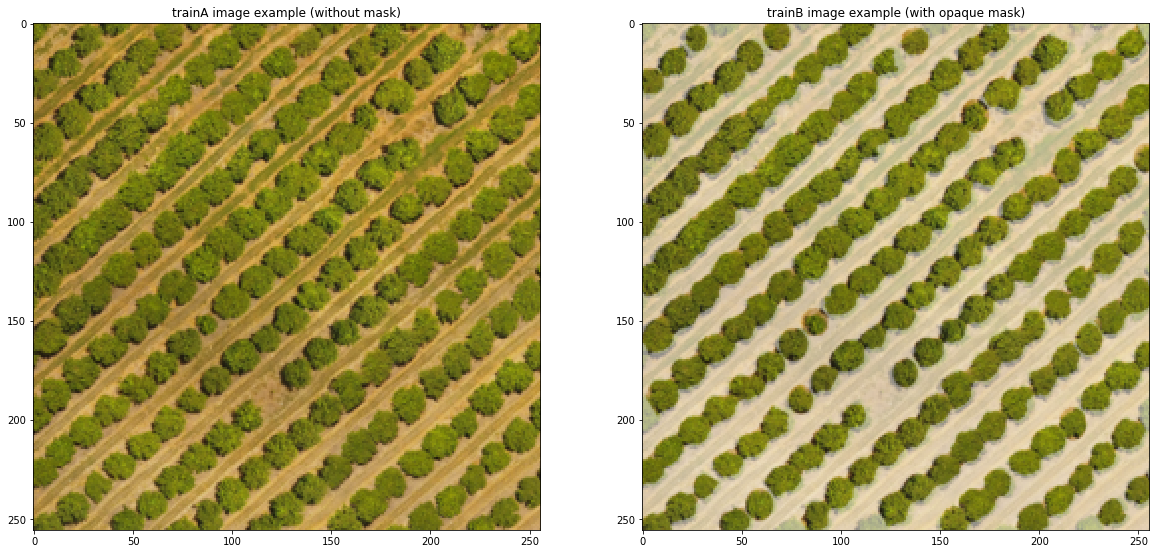

In [0]:
# Use rasterio to open the .tif images
# TODO: change the paths 
trainA_img = rasterio.open('/content/gdrive/My Drive/trees_and_masks_256/trainA/15558.tif')
trainB_img = rasterio.open('/content/gdrive/My Drive/trees_and_masks_256/trainB/15558.tif')
# Read the images as numpy arrays
trainA_img_np_array = trainA_img.read(out_dtype='uint8')
trainB_img_np_array = trainB_img.read(out_dtype='uint8')
# Swap axes because rasterio reads in images as (B, W, H) and imshow needs (W, H, B)
trainA_img_np_array = np.swapaxes(trainA_img_np_array,0,2)
trainB_img_np_array = np.swapaxes(trainB_img_np_array,0,2)
f, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].set_title("trainA image example (without mask)")
axarr[0].imshow(trainA_img_np_array)
axarr[1].set_title("trainB image example (with opaque mask)")
axarr[1].imshow(trainB_img_np_array)
plt.show()  

# Hackathon Challenge

## BASELINE MODEL

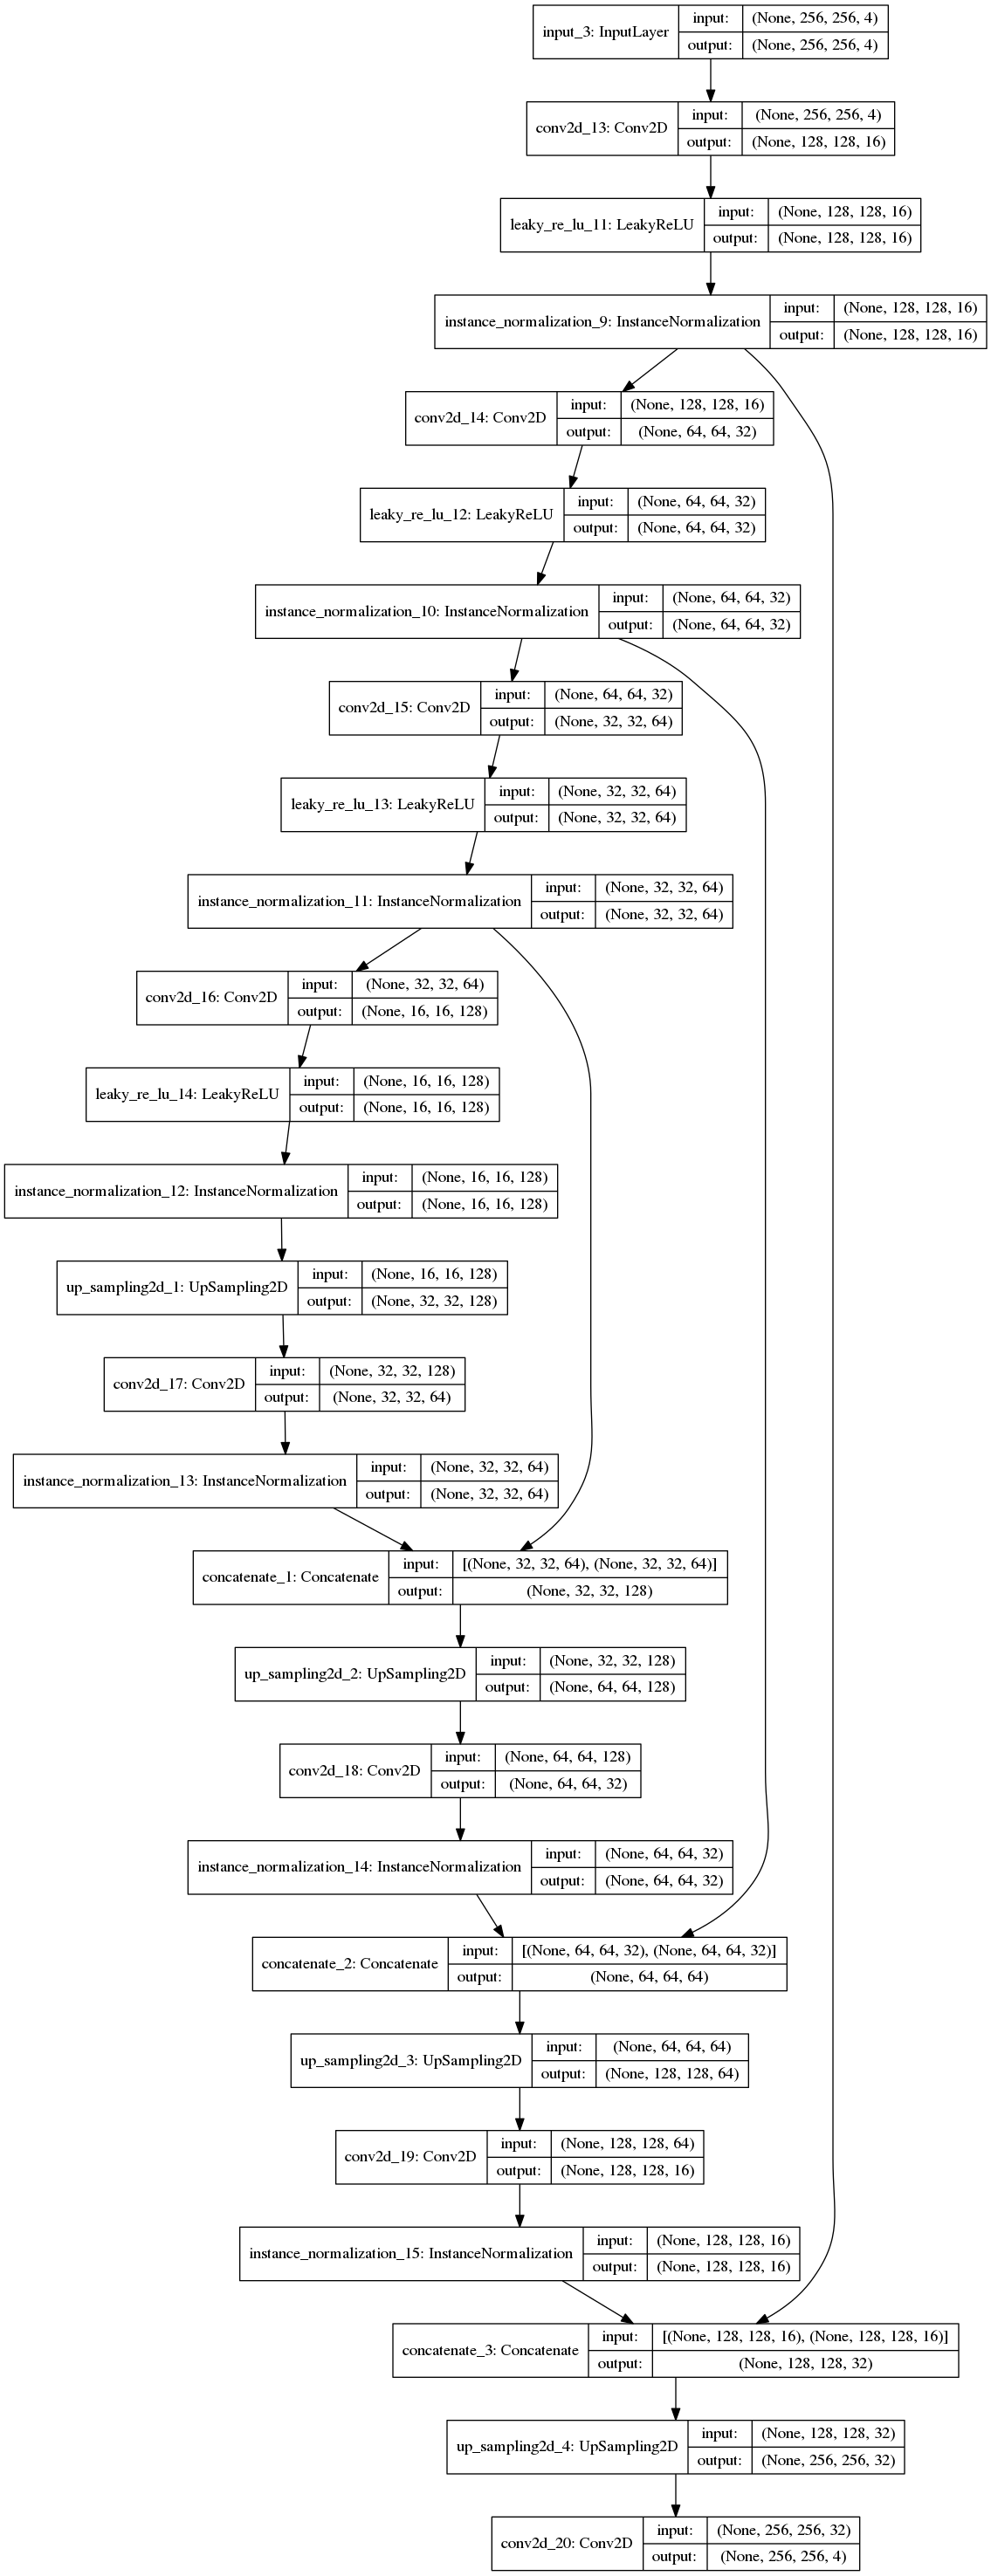

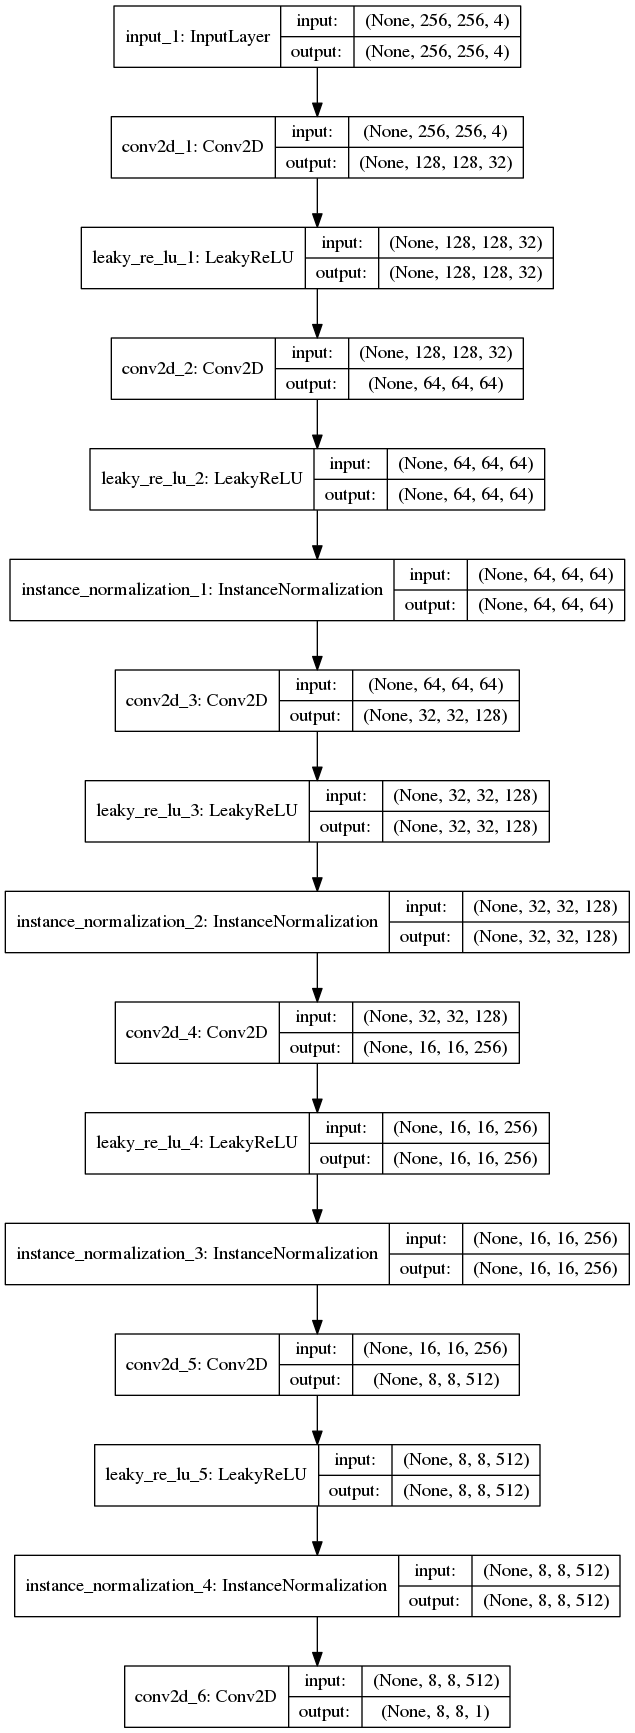

In [0]:
from IPython.display import Image, display
display(Image('/content/gdrive/My Drive/trees_and_masks_256/g_AB.png', width=800))
display(Image('/content/gdrive/My Drive/trees_and_masks_256/d_A.png', width=600))

In [0]:
!nvidia-smi

Mon Apr 15 20:06:40 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-qtdhk42_
  Stored in directory: /tmp/pip-ephem-wheel-cache-fewp5ie2/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
import scipy
from glob import glob
import numpy as np


class DataLoader():
    def __init__(self, dataset_name, img_res=(256, 256)):
        self.dataset_name = dataset_name
        self.img_res = img_res

    def load_data(self, domain, batch_size=1, is_testing=False):
        data_type = "train%s" % domain if not is_testing else "val%s" % domain
        path = glob('./datasets/%s/%s/*' % (self.dataset_name, data_type))

        batch_images = np.random.choice(path, size=batch_size)

        imgs = []
        for img_path in batch_images:
            img = self.imread(img_path)
            if not is_testing:
                img = scipy.misc.imresize(img, self.img_res)

                if np.random.random() > 0.5:
                    img = np.fliplr(img)
            else:
                img = scipy.misc.imresize(img, self.img_res)
            imgs.append(img)

        imgs = np.array(imgs)/127.5 - 1.

        return imgs

    def load_batch(self, batch_size=1, is_testing=False):
        data_type = "train" if not is_testing else "val"
        path_A = glob('./datasets/%s/%sA/*' % (self.dataset_name, data_type))
        path_B = glob('./datasets/%s/%sB/*' % (self.dataset_name, data_type))

        self.n_batches = int(min(len(path_A), len(path_B)) / batch_size)
        total_samples = self.n_batches * batch_size

        # Sample n_batches * batch_size from each path list so that model sees all
        # samples from both domains
        path_A = np.random.choice(path_A, total_samples, replace=False)
        path_B = np.random.choice(path_B, total_samples, replace=False)

        for i in range(self.n_batches-1):
            batch_A = path_A[i*batch_size:(i+1)*batch_size]
            batch_B = path_B[i*batch_size:(i+1)*batch_size]
            imgs_A, imgs_B = [], []
            for img_A, img_B in zip(batch_A, batch_B):
                img_A = self.imread(img_A)
                img_B = self.imread(img_B)

                img_A = scipy.misc.imresize(img_A, self.img_res)
                img_B = scipy.misc.imresize(img_B, self.img_res)

                if not is_testing and np.random.random() > 0.5:
                        img_A = np.fliplr(img_A)
                        img_B = np.fliplr(img_B)

                imgs_A.append(img_A)
                imgs_B.append(img_B)

            imgs_A = np.array(imgs_A)/127.5 - 1.
            imgs_B = np.array(imgs_B)/127.5 - 1.

            yield imgs_A, imgs_B

    def load_img(self, path):
        img = self.imread(path)
        img = scipy.misc.imresize(img, self.img_res)
        img = img/127.5 - 1.
        return img[np.newaxis, :, :, :]

    def imread(self, path):
        return scipy.misc.imread(path, mode='RGBA').astype(np.float)


In [0]:

from __future__ import print_function, division

from keras.utils.vis_utils import plot_model
from keras.datasets import mnist
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate,GaussianNoise
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model, model_from_json, load_model
import scipy
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
import os
import json
from skimage import filters

class CycleGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 256
        self.img_cols = 256
        self.channels = 4
        self.img_shape = (self.img_rows, self.img_cols, self.channels)

        # Configure data loader
        self.dataset_name = 'trees_and_masks_256'
        self.data_loader = DataLoader(dataset_name=self.dataset_name,
                                      img_res=(self.img_rows, self.img_cols))

        # Calculate output shape of D (PatchGAN)
        patch = int(self.img_rows / 2**5)
        self.disc_patch = (patch, patch, 1)

        # Number of filters in the first layer of G and D
        self.gf = 16
        self.df = 16

        # Loss weights stage 2
        self.lambda_cycle = 10.0  # Cycle-consistency loss
        self.lambda_id = 1.0      # ID-loss GenA should not change imgA much

        optimizer = Adam(0.0002, 0.5)
        continue_from_previous_weights = False

        # Load previously trained models
        if continue_from_previous_weights:
            epoch = str(26)
            print("starting with pretrained weights")
            save_folder = "./saved_model"

            with open("/content/saved_model/modelDA.json", 'r') as json_file:
                architecture = json.load(json_file)
                self.d_A = model_from_json(json.dumps(architecture))
            self.d_A.load_weights(save_folder + "/temp_weights_DA" + epoch + ".hf")

            with open(save_folder + "/modelDB.json", 'r') as json_file:
                architecture = json.load(json_file)
                self.d_B = model_from_json(json.dumps(architecture))
            self.d_B.load_weights(save_folder + "/temp_weights_DB" + epoch + ".hf")

            with open(save_folder + "/modelGAB.json", 'r') as json_file:
                architecture = json.load(json_file)
                self.g_AB = model_from_json(json.dumps(architecture))
            self.g_AB.load_weights(save_folder + "/temp_weights_GAB" + epoch + ".hf")

            with open(save_folder + "/modelGBA.json", 'r') as json_file:
                architecture = json.load(json_file)
                self.g_BA = model_from_json(json.dumps(architecture))
            self.g_BA.load_weights(save_folder + "/temp_weights_GBA" + epoch + ".hf")

        else:
            print("starting with random weights")
            self.d_A = self.build_discriminator()
            self.d_B = self.build_discriminator()
            self.g_AB = self.build_generator()
            self.g_BA = self.build_generator()

        self.d_A.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.d_B.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

        #-------------------------
        # Construct Computational
        #   Graph of Generators
        #-------------------------

        # Input images from both domains
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape)

        # Translate images to the other domain
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)
        # Translate images back to original domain
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)
        # Identity mapping of images
        img_A_id = self.g_BA(img_A)
        img_B_id = self.g_AB(img_B)

        # For the combined model we will only train the generators
        self.d_A.trainable = False
        self.d_B.trainable = False

        # Discriminators determines validity of translated images
        valid_A = self.d_A(fake_A)
        valid_B = self.d_B(fake_B)

        # Combined model trains generators to fool discriminators
        self.combined = Model(inputs=[img_A, img_B],
                              outputs=[ valid_A, valid_B,
                                        reconstr_A, reconstr_B,
                                        img_A_id, img_B_id ])
        self.combined.compile(loss=['mse', 'mse',
                                    'mae', 'mae',
                                    'mae', 'mae'],
                            loss_weights=[ 1, 1,
                                           self.lambda_cycle, self.lambda_cycle,
                                           self.lambda_id, self.lambda_id ],
                            optimizer=optimizer)

    def build_generator(self):
        """U-Net Generator"""

        def conv2d(layer_input, filters, f_size=4):
            """Layers used during downsampling"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            d = InstanceNormalization()(d)
            return d

        def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            """Layers used during upsampling"""
            u = UpSampling2D(size=2)(layer_input)
            u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
            if dropout_rate:
                u = Dropout(dropout_rate)(u)
            u = InstanceNormalization()(u)
            u = Concatenate()([u, skip_input])
            return u

        # Image input
        d0 = Input(shape=self.img_shape)

        # Downsampling
        d1 = conv2d(d0, self.gf)
        d2 = conv2d(d1, self.gf * 2)
        d3 = conv2d(d2, self.gf * 4)
        d4 = conv2d(d3, self.gf * 8)
        
        # Upsampling
        u1 = deconv2d(d4, d3, self.gf * 4)
        u2 = deconv2d(u1, d2, self.gf * 2)
        u3 = deconv2d(u2, d1, self.gf)

        u4 = UpSampling2D(size=2)(u3)
        output_img = Conv2D(self.channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u4)
        output_img = GaussianNoise(0.001)(output_img)

        return Model(d0, output_img)

    def build_discriminator(self):

        def d_layer(layer_input, filters, f_size=4, normalization=True):
            """Discriminator layer"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if normalization:
                d = InstanceNormalization()(d)
            return d

        img = Input(shape=self.img_shape)

        d1 = d_layer(img, self.df, normalization=False)
        d2 = d_layer(d1, self.df * 2)
        d3 = d_layer(d2, self.df * 4)
        d4 = d_layer(d3, self.df * 8)
        d5 = d_layer(d4, self.df * 16)

        validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d5)

        return Model(img, validity)

    def train(self, epochs, batch_size=1, sample_interval=50):

        start_time = datetime.datetime.now()

        # Adversarial loss ground truths
        valid = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)

        for epoch in range(epochs):
            for batch_i, (imgs_A, imgs_B) in enumerate(self.data_loader.load_batch(batch_size)):

                # ----------------------
                #  Train Discriminators
                # ----------------------

                # Translate images to opposite domain
                fake_B = self.g_AB.predict(imgs_A)
                fake_A = self.g_BA.predict(imgs_B)

                # Train the discriminators (original images = real / translated = Fake)
                dA_loss_real = self.d_A.train_on_batch(imgs_A, valid)
                dA_loss_fake = self.d_A.train_on_batch(fake_A, fake)
                dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)

                dB_loss_real = self.d_B.train_on_batch(imgs_B, valid)
                dB_loss_fake = self.d_B.train_on_batch(fake_B, fake)
                dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

                # Total disciminator loss
                d_loss = 0.5 * np.add(dA_loss, dB_loss)


                # ------------------
                #  Train Generators
                # ------------------

                # Train the generators
                g_loss = self.combined.train_on_batch([imgs_A, imgs_B],
                                                        [valid, valid,
                                                        imgs_A, imgs_B,
                                                        imgs_A, imgs_B])

                elapsed_time = datetime.datetime.now() - start_time

                # If at save interval => save generated image samples
                if batch_i % sample_interval == 0:
                    self.sample_images(epoch, batch_i)
                    # Plot the progress
                    print ("[Epoch %d/%d] [Batch %d/%d] [D loss: %f, acc: %3d%%] [G loss: %05f, adv: %05f, recon: %05f, id: %05f] time: %s " \
                            % ( epoch, epochs,
                                batch_i, self.data_loader.n_batches,
                                d_loss[0], 100*d_loss[1],
                                g_loss[0],
                                np.mean(g_loss[1:3]),
                                np.mean(g_loss[3:5]),
                                np.mean(g_loss[5:6]),
                                elapsed_time))

            # serialize model to JSON
            model_json = self.g_AB.to_json()
            with open("./saved_model/modelGAB.json", "w") as json_file:
                json_file.write(model_json)
            model_json = self.g_BA.to_json()
            with open("./saved_model/modelGBA.json", "w") as json_file:
                json_file.write(model_json)
            model_json = self.d_A.to_json()
            with open("./saved_model/modelDA.json", "w") as json_file:
                json_file.write(model_json)
            model_json = self.d_B.to_json()
            with open("./saved_model/modelDB.json", "w") as json_file:
                json_file.write(model_json)

            # serialize weights to HDF5
            self.g_AB.save_weights("./saved_model/temp_weights_GAB"+str(epoch)+".hf")
            self.g_BA.save_weights("./saved_model/temp_weights_GBA"+str(epoch)+".hf")
            self.d_A.save_weights("./saved_model/temp_weights_DA"+str(epoch)+".hf")
            self.d_B.save_weights("./saved_model/temp_weights_DB"+str(epoch)+".hf")

    def sample_images(self, epoch, batch_i):
        os.makedirs('images/%s' % self.dataset_name, exist_ok=True)
        r, c = 2, 4

        imgs_A = self.data_loader.load_data(domain="A", batch_size=1, is_testing=True)
        imgs_B = self.data_loader.load_data(domain="B", batch_size=1, is_testing=True)

        # Translate images to the other domain
        fake_B = self.g_AB.predict(imgs_A)
        fake_A = self.g_BA.predict(imgs_B)
        # Translate back to original domain
        reconstr_A = self.g_BA.predict(fake_B)
        reconstr_B = self.g_AB.predict(fake_A)
        
        # mask_B = np.dstack([fake_B[:,:,:,3],fake_B[:,:,:,3],fake_B[:,:,:,3],fake_B[:,:,:,3]])
        mask_B = np.ones(fake_B.shape) * 255
        mask_B[:,:,:,0]  = fake_B[:,:,:,3]
        mask_B[:,:,:,1]  = fake_B[:,:,:,3]
        mask_B[:,:,:,2]  = fake_B[:,:,:,3]
        val = filters.threshold_otsu(fake_B[:,:,:,3])

        mask_B[mask_B[:,:,:,0] < val] = [0,0,0,0]
        mask_B[mask_B[:,:,:,0] >= val] = [255,255,255,255]
        
        mask_A = np.ones(imgs_B.shape) * 255
        mask_A[:,:,:,0]  = imgs_B[:,:,:,3]
        mask_A[:,:,:,1]  = imgs_B[:,:,:,3]
        mask_A[:,:,:,2]  = imgs_B[:,:,:,3]

        gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, mask_B, imgs_B, fake_A, reconstr_B, mask_A])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Original', 'Translated', 'Reconstructed', 'Mask']
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt])
                axs[i, j].set_title(titles[j])
                axs[i, j].axis('off')
                cnt += 1
        plt.rcParams["figure.figsize"] = (20, 20)
        fig.savefig("images/%s/%d_%d.png" % (self.dataset_name, epoch, batch_i))
        plt.close()

Using TensorFlow backend.


## EXAMPLE USAGE

In [0]:
# If you make edits to the above cells rember to run them before running this cell
gan = CycleGAN()
print("GENERATOR SUMMARY")
print(gan.g_AB.summary())

# This will write a 
plot_model(gan.g_AB, to_file='g_AB.png', show_shapes=True, show_layer_names=True)

print("DISCRIMINATOR SUMMARY")
print(gan.d_A.summary())
plot_model(gan.d_A, to_file='d_A.png', show_shapes=True, show_layer_names=True)

gan.train(epochs=10, batch_size=16, sample_interval=100)
# save the final model
gan.g_AB.save("./saved_model/final_model.hf")

Instructions for updating:
Colocations handled automatically by placer.
starting with random weights


####Visualize your data during epochs

While you wait for the model to run you can visualize how the model is doing. By going to the images folder >>> trees_and_masks_256>> *_0.png (where the asterisk represents the epoch).

In each of the images there are two rows of four images. Row one is translating a class A(no mask) image to a class B (image with mask) image and back to a class A image, with the last image as the resulting mask as a grayscale image. 

Row two is translating a class B image to a class A image back to a class B image, with the original mask from Class B being displayed as the last image.


## Inference

In [0]:
from scipy.misc import imread
from skimage.filters import threshold_otsu

!cp -r "/content/gdrive/My Drive/Colab Notebooks/datasets/trees_and_masks_256/test" "./"
!cp -r "/content/gdrive/My Drive/Colab Notebooks/datasets/trees_and_masks_256/gt_masks" "./"


test_folder = "./test/"
gt_folder = "./gt_masks/"

IOU_scores = []

for im in os.listdir(test_folder):
    gt_mask = imread(gt_folder + im)[:, :, 0]

    image = imread(test_folder + im, mode='RGBA').astype(np.float)
    image = np.array(image) / 127.5 - 1.
    image = np.array([image])
    output = gan.g_AB.predict(image)
    mask = np.reshape(output, (256, 256, 4))

    thresh = threshold_otsu(output[:,:,3])

    print("thresh", thresh)

    mask[mask[:, :, 3] > thresh] = 255
    mask[mask[:, :, 3] < thresh] = 0
    mask[:, :, 3] = 255

    plt.imsave("./output/binary_"+im, mask)

    union = np.zeros(mask.shape)
    union[mask > 0] = 1
    union[gt_mask > 0] = 1

    intersection = np.ones(mask.shape)
    intersection[mask < 255] = 0
    intersection[gt_mask < 255] = 0

    IOU = np.sum(intersection)/np.sum(union)

    print("image        :", im)
    print("intersection :", np.sum(intersection))
    print("union        :", np.sum(union))
    print("IOU          :", IOU)

    IOU_scores.append(IOU)

print("final_score = ", np.mean(IOU_scores))


## Save all your models to your google drive

In [0]:
!cp "/content/saved_model/modelDA.json" "/content/gdrive/My Drive/saved_model/" && cp "/content/saved_model/modelDB.json" "/content/gdrive/My Drive/saved_model/"\
&& cp "/content/saved_model/modelGAB.json" "/content/gdrive/My Drive/saved_model/"  && cp "/content/saved_model/modelGBA.json" "/content/gdrive/My Drive/saved_model/" 

In [0]:
!cp "/content/saved_model/temp_weights_DA9.hf" "/content/gdrive/My Drive/saved_model/"\
&& cp "/content/saved_model/temp_weights_DB9.hf" "/content/gdrive/My Drive/saved_model/"\
&& cp "/content/saved_model/temp_weights_GAB9.hf" "/content/gdrive/My Drive/saved_model/"\
&& cp "/content/saved_model/temp_weights_GBA9.hf" "/content/gdrive/My Drive/saved_model/" 



## Or just save the generator AtoB

## SOME CRAZY IDEAS TO TRY



1.   Mix different GAN frameworks together eg: by training a generator and discriminator for a few epochs using cycleGAN and then carry on training using DCGAN
2.   Change the loss weights dynamically. Starting with cycleGAN, try decreasing the cycle loss weights gradually. Starting with high cycle loss helps avoid mode collapse at lower epochs and having a higher weighting for the discriminator loss may improve generator at higher epochs
3. Change the loss weights periodically, different weighting configurations could function as temperature in a simulated annealing method.
4. Change the loss weights based on how the models are performing. eg: if the adversarial loss is high then increase the adversarial loss weighting
5. Try creating more than one generator/discriminator pair. The loss calculation for this approach could be based on the average of the adversaries or some other more complicated scoring scheme such as winner takes all (think poker). Compare this to batch learning with a single pair.
6. If we only care about training one of the generator/adversary pairs then try changing the loss weighting for that pair.
7. Can data cleaning and smaller, "more accurate" data subsets preform better than using all of the training images? 



---

# Submission Details

## HOW TO SUBMIT YOUR ANSWERS

A test set will be released 1 hour before prize giving into the google folder which contains the training and validation data. We ask that the competitor sets up a google drive and shares it with us at garth@aerobotics.co 

## PRIZES UP FOR GRABS

1st prize:

*   1 x The Elements of Statistical Learning
*   1 x Pattern Recognition with Machine Learning
*   1 x MachineLearning: A Probabilistic Perspective
*   1 x Reinforcement Learning: An Introduction
*   1 x Huawei Bluetooth earphones

2nd prize:

*   1 x The Elements of Statistical Learning
*   1 x Pattern Recognition with Machine Learning 
*   1 x MachineLearning: A Probabilistic Perspective
*   1 x Huawei Bluetooth earphones
